Problem 1

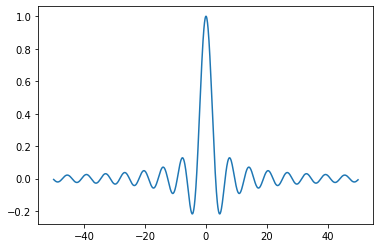

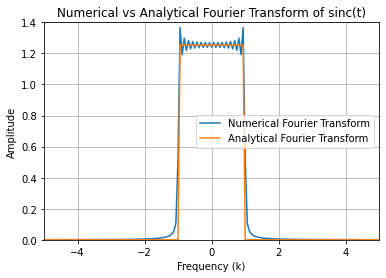

In [22]:
import numpy as np
import matplotlib.pyplot as plt


t_min = -50 
t_max = 50  
num_samples =1024  
delta_t = (t_max - t_min) / (num_samples-1)  
t = np.linspace(t_min, t_max, num_samples, endpoint=False)


f = np.zeros_like(t)
for i in range(len(t)):
    if t[i] == 0:
        f[i] = 1
    else:
        f[i] = np.sin(t[i]) / t[i]

plt.plot(t,f)
plt.show()


f_dft = np.fft.fft(f,norm='ortho')
k = (2*np.pi)*np.fft.fftfreq(num_samples, delta_t)  

F_continuous = delta_t * np.sqrt(num_samples / (2 * np.pi)) * np.exp(-1j * k * t_min) * f_dft

F_continuous =np.fft.fftshift(F_continuous)
k = np.fft.fftshift(k)


def box(f):
    return   np.where(np.abs(f) <= 1,np.pi*(1/np.sqrt(2*np.pi)), 0)

F_analytical = box(k)


plt.plot(k,  np.abs(F_continuous), label='Numerical Fourier Transform')
plt.plot(k, F_analytical, label='Analytical Fourier Transform')
plt.title('Numerical vs Analytical Fourier Transform of sinc(t)')
plt.xlabel('Frequency (k)')
plt.ylabel('Amplitude')
plt.xlim(-5, 5)  
plt.ylim(0,1.4) 
plt.legend()
plt.grid(True)
plt.show()

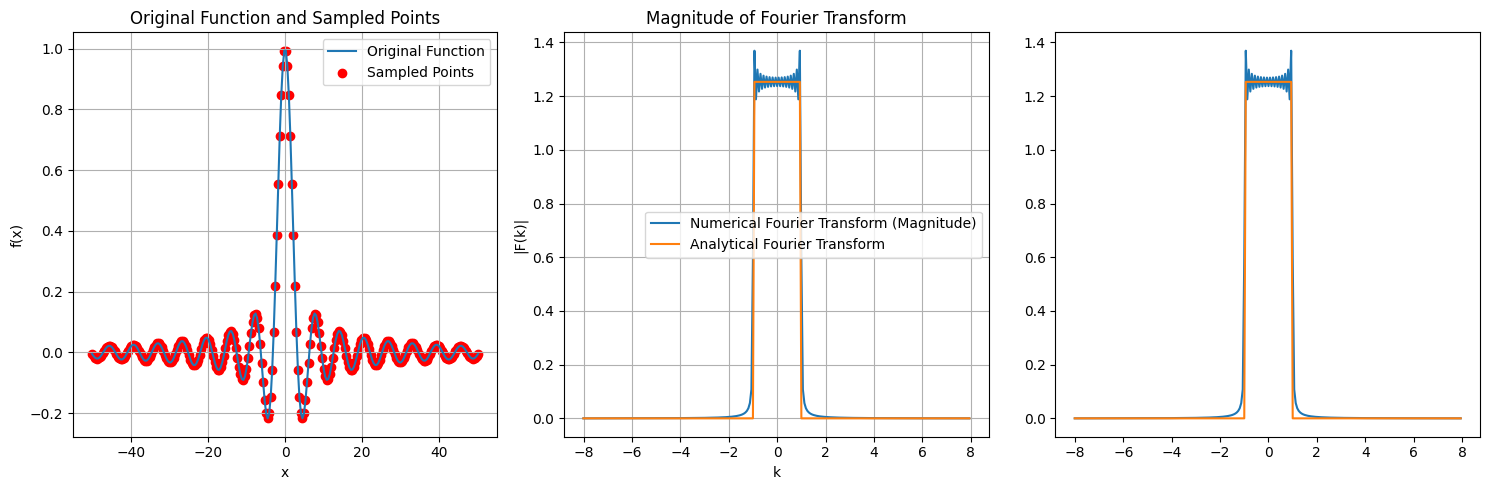

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.where(x == 0, 1, np.sin(x) / x)

# Define parameters
xmin = -50
xmax = 50
n = 256

dx = (xmax - xmin) / (n - 1)

# Compute sample points and the function values at those points
xx = np.linspace(xmin, xmax, n)
sample_value = f(xx)


shift=np.fft.fftshift(sample_value)


# Compute the Fourier transform of the sample values
fft_sample = np.fft.fftshift(np.fft.fft(np.fft.fftshift(sample_value),norm='ortho'))

fft1_sample = np.fft.fftshift(np.fft.fft((sample_value),norm='ortho'))

# Define the k-values for the Fourier transform
kk = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(n, dx))


k = (2*np.pi)*np.fft.fftfreq(n, dx)
k = np.fft.fftshift(k)

# Compute the integral factor exp(-ikx_min)
int_fact = np.exp(-1j * kk * xmin)

# Compute the numerical Fourier transform with proper scaling
fft_numerical = fft_sample * dx*int_fact*(n/(2*np.pi))**0.5
fft1_numerical = fft1_sample * dx*int_fact*(n/(2*np.pi))**0.5
# Compute the analytical Fourier transform
# analytic fourier transfrom f(k)=(np.pi/2)*0.5  -1<=k=<1  otherwise 0
analytical_ft = np.where(np.abs(kk) <= 1, (np.pi/2)**0.5, 0)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(xx, f(xx), label='Original Function')
plt.scatter(xx, sample_value, label='Sampled Points', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Original Function and Sampled Points')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(kk, np.abs(fft_numerical), label='Numerical Fourier Transform (Magnitude)')
plt.plot(kk, analytical_ft, label="Analytical Fourier Transform")
plt.xlabel('k')
plt.ylabel('|F(k)|')
plt.title('Magnitude of Fourier Transform')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(k, np.abs(fft1_numerical), label='Numerical Fourier Transform (Magnitude)')
plt.plot(k, analytical_ft, label="Analytical Fourier Transform")
plt.tight_layout()
plt.show()